In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import regex as re

from matplotlib.ticker import MaxNLocator

In [182]:
import matplotlib.patches as mpatches

In [183]:
import warnings
warnings.filterwarnings("ignore")

In [184]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

In [185]:
#set seaborn plotting aesthetics
sns.set(style='whitegrid')
sns.set_context('notebook')

### Set up functions to be used

In [186]:
def return_num(text):
    zip_list = re.findall('[0-9]+', text)
    return zip_list

In [187]:
def drop_nonzips(df_list):
    if len(df_list)>1:
        for i in df_list:
            if i == '0':
                df_list.remove(i)
            if i == '':
                return np.nan
    return df_list

In [188]:
def make_five(text):
    if len(text) == 4:
        return '0'+text
    elif len(text) == 3:
        return ''
    elif len(text) > 5:
        return ''
    else:
        return text

## Upload all the english surveys

In [189]:
wellbeing = pd.read_excel('./Data/ARISE_wellbeing.xlsx', sheet_name='well-being')

In [190]:
wellbeing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateentered          1399 non-null   datetime64[ns]
 1   respondentID         1399 non-null   object        
 2   consent              1281 non-null   object        
 3   Initials:            1307 non-null   object        
 4   coalition            1309 non-null   object        
 5   zip                  1327 non-null   object        
 6   current_wellbeing    1261 non-null   float64       
 7   future_wellbeing     1182 non-null   float64       
 8   financial_wellbeing  1204 non-null   float64       
 9   needs                1283 non-null   object        
 10  want_referral        1263 non-null   object        
 11  vaccine_self         1091 non-null   object        
 12  vaccine_children     1077 non-null   float64       
 13  connect_vaccine      1121 non-nul

In [191]:
wellbeing = wellbeing[['current_wellbeing', 'future_wellbeing', 'financial_wellbeing', 'needs',
                      'great_community', 'community_belonging', 'institutional trust', 'emotionally_upset',
                      'main_reason']].copy()

In [192]:
wellbeing['source'] = 'general'

In [193]:
heart_full = pd.read_excel('./Data/ARISE_HEART_well-being.xlsx', sheet_name='Full')

In [194]:
heart_full = heart_full[['current_wellbeing', 'future_wellbeing', 'financial_wellbeing', 'needs',
                      'great_community', 'community_belonging', 'institutional trust', 'emotionally_upset',
                        'main_reason']].copy()

In [195]:
heart_full['source'] = 'Full Heart Survey'

In [196]:
heart_part1 = pd.read_excel('./Data/ARISE_HEART_well-being.xlsx', sheet_name='Part I')

In [197]:
heart_part1 = heart_part1[['current_wellbeing', 'future_wellbeing', 'financial_wellbeing', 'needs']].copy()

In [198]:
heart_part1['source'] = 'Heart Part 1'

In [199]:
heart_part2 = pd.read_excel('./Data/ARISE_HEART_well-being.xlsx', sheet_name='Part II')

In [200]:
heart_part2 = heart_part2[['current_wellbeing', 'future_wellbeing', 
                      'great_community', 'community_belonging', 'institutional_trust', 'emotionally_upset',
                          'main_reason']].copy()

In [220]:
heart_part2.rename(columns={'institutional_trust': 'institutional trust'}, inplace=True)

In [201]:
heart_part2['source'] = 'Heart Part 2'

In [202]:
kankakee_1 = pd.read_excel('./Data/ARISE_Kankakee.xlsx', sheet_name='Parent')

In [203]:
kankakee_1 = kankakee_1[['current_wellbeing', 'future_wellbeing', 'needs',
                      'great_community', 'community_belonging', 'institutional trust', 'emotionally_upset',
                        'main_reason']].copy()

In [204]:
kankakee_1['source'] = 'Kankakee Parents'

In [205]:
kankakee_2 = pd.read_excel('./Data/ARISE_Kankakee.xlsx', sheet_name='Youth')

In [206]:
kankakee_2 = kankakee_2[['current_wellbeing', 'future_wellbeing',
                      'great_community', 'institutional trust']].copy()

In [207]:
kankakee_2['source'] = 'Kankakee Youth'

In [208]:
black_brown = pd.read_csv('./Data/ARISE_Wellness_Black_brown.csv')

In [209]:
black_brown = black_brown[['current_wellbeing', 'great_community', 'needs', 'institutional_trust']].copy()

In [228]:
black_brown.rename(columns={'institutional_trust': 'institutional trust'}, inplace=True)

In [229]:
black_brown['source'] = 'Black and Brown'

### Look at the columns for each sheet

In [230]:
wellbeing.columns

Index(['current_wellbeing', 'future_wellbeing', 'financial_wellbeing', 'needs',
       'great_community', 'community_belonging', 'institutional trust',
       'emotionally_upset', 'main_reason', 'source'],
      dtype='object')

In [231]:
heart_full.columns

Index(['current_wellbeing', 'future_wellbeing', 'financial_wellbeing', 'needs',
       'great_community', 'community_belonging', 'institutional trust',
       'emotionally_upset', 'main_reason', 'source'],
      dtype='object')

In [232]:
heart_part1.columns

Index(['current_wellbeing', 'future_wellbeing', 'financial_wellbeing', 'needs',
       'source'],
      dtype='object')

In [233]:
heart_part2.columns

Index(['current_wellbeing', 'future_wellbeing', 'great_community',
       'community_belonging', 'institutional trust', 'emotionally_upset',
       'main_reason', 'source'],
      dtype='object')

In [234]:
kankakee_1.columns

Index(['current_wellbeing', 'future_wellbeing', 'needs', 'great_community',
       'community_belonging', 'institutional trust', 'emotionally_upset',
       'main_reason', 'source'],
      dtype='object')

In [235]:
kankakee_2.columns

Index(['current_wellbeing', 'future_wellbeing', 'great_community',
       'institutional trust', 'source'],
      dtype='object')

In [236]:
black_brown.columns

Index(['current_wellbeing', 'great_community', 'needs', 'institutional trust',
       'source'],
      dtype='object')

### Concatenate all the dfs

In [238]:
dfs = [wellbeing, heart_full, heart_part1, heart_part2, kankakee_1, kankakee_2, black_brown]

In [239]:
all_surveys = pd.concat(dfs, axis=0)

In [240]:
all_surveys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2470 entries, 0 to 816
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   current_wellbeing    2110 non-null   float64
 1   future_wellbeing     1360 non-null   float64
 2   financial_wellbeing  1321 non-null   float64
 3   needs                2156 non-null   object 
 4   great_community      2030 non-null   object 
 5   community_belonging  446 non-null    object 
 6   institutional trust  1966 non-null   object 
 7   emotionally_upset    1295 non-null   object 
 8   main_reason          205 non-null    object 
 9   source               2470 non-null   object 
dtypes: float64(3), object(7)
memory usage: 212.3+ KB


### Wellbeing

In [45]:
conditions = [
    (all_surveys['current_wellbeing'] <= 4),
    (all_surveys['current_wellbeing'] > 4) & (all_surveys['current_wellbeing'] < 7),
    (all_surveys['current_wellbeing'] >= 7)
]

values = ['Suffering', 'Struggling', 'Thriving']

In [46]:
all_surveys['wellbeing_category'] = np.select(conditions, values)

In [47]:
all_surveys['wellbeing_category'].value_counts()

Thriving      1126
Struggling     629
0              360
Suffering      355
Name: wellbeing_category, dtype: int64

In [48]:
wellbeing_pie = all_surveys.groupby('wellbeing_category').count().reset_index().rename(columns={'current_wellbeing':'total'})

In [49]:
wellbeing_pie = wellbeing_pie[['wellbeing_category', 'total']].drop(index=0)

In [50]:
wellbeing_pie

,wellbeing_category,total
1,Struggling,629
2,Suffering,355
3,Thriving,1126


In [175]:
wellbeing_pie['total'].sum()

2110

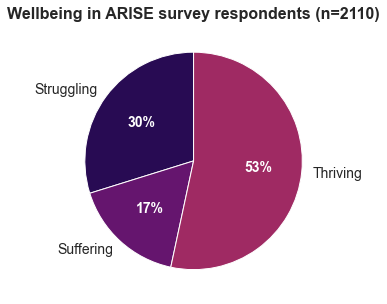

In [177]:
#sns.set(font_scale = 1.1)
plt.figure(figsize=(5,5))
patches, texts, autotexts = plt.pie(x=wellbeing_pie['total'], labels=wellbeing_pie['wellbeing_category'],
                                                       autopct='%1.0f%%', 
                                                       startangle=90, 
                                                       colors = sns.color_palette('inferno'))

plt.title('Wellbeing in ARISE survey respondents (n=2110)',
         fontdict={'size':16, 'fontweight': 'bold'})

for text in texts:
    #text.set_fontweight('bold')
    text.set_size(14);
    
for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    # autotext.set_fontstyle('italic')
    autotext.set_color('w')
    autotext.set_fontweight('bold')
    autotext.set_size(14)

plt.savefig('./Figures/ARISE wellbeing totals', bbox_inches = 'tight', edgecolor='w')

### Needs

In [52]:
# define a function to clean the white spaces
def strip_strings(my_list):
    stripped = [s.strip() for s in my_list]
    return stripped

# define function, one in which we return answers that corresponds to the selected answer choices
def return_same(text, list1):
    sames = np.intersect1d(text, list1)
    return sames

# define a function that vectorizes responses from multi-choice questions
def make_vectorized_answers(dataframe, column):
    
    df = dataframe[[column]].copy()
    df[column] = df[column].replace('^\t', '', regex=True)
    
    #Make a list of the answers 
    answer_choices = df[column].dropna().unique().tolist()
    answer_choices = ', '.join(answer_choices)
    answer_choices = answer_choices.split(',')
    answer_choices = strip_strings(answer_choices)
    
#     answer_choices = ['Food', 'Rent', 'Utilities', 'Housing', 'COVID vaccine', 'Flu vaccine', 
#                      'Other vaccines', 'Insurance', 'Primary care or other health care',
#                      'Health Insurance', 'Finances', 'Transportation', 'Addressing Loneliness', 
#                      'Personal Safety', 'Employment', 'Childcare', 'Caregiver support',
#                      'There is nothing I need help with', 'I prefer not to answer']
    
    # make the column into a list for each answer that will go into the needs dataframe
    df['answer_list'] = df[column].str.split(',\s*')
    
     # transform the column:
    df['answer_list'] = df['answer_list'].apply(lambda x: strip_strings(x) if(np.all(pd.notnull(x))) else x)
    
    # make a new column for the answers that corresponded to the answer choices 
    df['answers'] = df['answer_list'].apply(lambda x: return_same(x, answer_choices))
    
    # Turn the returned list into a string for the 'answers' and 'other' columns
    df['answers'] = df['answers'].apply(lambda x: ', '.join(set(x.astype(str))))
    
    # vectorize responsed that fall under the selected answer choices 
    df_dummy = df['answers'].str.get_dummies(sep=', ')
    
    return df_dummy

In [53]:
needs_df = make_vectorized_answers(all_surveys, 'needs')

In [54]:
needs_df['Health Insurance'] = needs_df['Health Insurance'] + needs_df['Health insurance']

In [55]:
needs_df.drop(columns='Health insurance', inplace=True)

In [56]:
needs_count = needs_df.sum().sort_values(ascending=True)[-21:]

In [57]:
needs_count.drop('Nothing I need help with', inplace=True)

In [58]:
total_needs = needs_df.shape[0]

In [59]:
needs_count = round((needs_count/total_needs)*100,1)

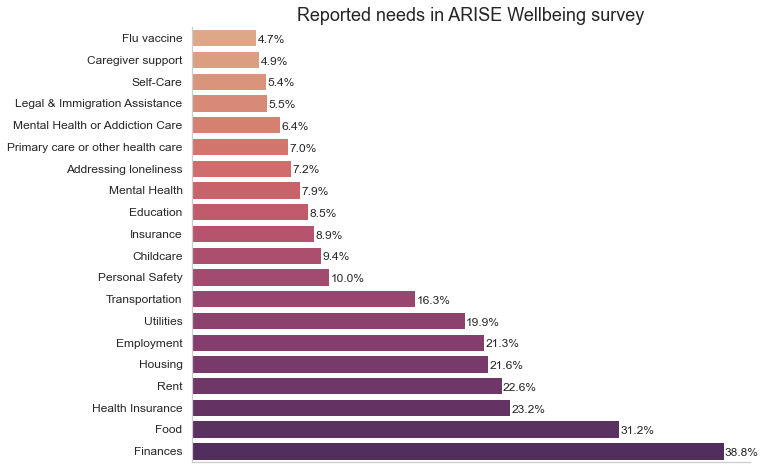

In [60]:
n = len(needs_count.index)
i = int(needs_count.max())+1

plt.figure(figsize=(10, 8))
g = sns.barplot(y=needs_count.index, x=needs_count, palette='flare')
g.set_xticks(range(i))
sns.despine(right=True, top=True)
plt.title('Reported needs in ARISE Wellbeing survey', fontdict={'size': 18})
plt.yticks(fontsize=12)
plt.xticks([])

for x, y, p in zip(needs_count.round(2), range(n),  needs_count.round(2)):
    p = str(p) + '%'
    plt.text(x+.1, y+.22, p, fontdict={'fontweight':'book'})
    
plt.savefig('./Figures/'+  'Reported needs in ARISE survey' , bbox_inches = 'tight', edgecolor='w')

In [61]:
clean_needs = needs_df.drop(columns=['Already have help.','Nothing I need help with','Other:', 'Prefer not to answer'])

In [62]:
clean_needs.shape[0]

2470

In [63]:
personal_needs_count = clean_needs.sum(axis=1)

In [64]:
(personal_needs_count>=2).sum()

1486

In [68]:
1486/2470

0.6016194331983805

In [69]:
(personal_needs_count>=3).sum()

1163

In [70]:
1163/2470

0.4708502024291498

### Civic belonging

In [71]:
all_surveys['great_community'].unique()

array(['Our community has access to lifelong learning across ages, Our community has access to good jobs that make it possible to live and provide for family',
       'Most people help other people to feel welcome and take part in our community, Everyone works to make the community better for everyone else, Our community makes it easy to access art and culture and gives people ways to express their culture',
       'Most people help other people to feel welcome and take part in our community, Everyone works to make the community better for everyone else, Everyone feels safe',
       'Most people help other people to feel welcome and take part in our community, People take care of each other and care about others, Our community has access to good jobs that make it possible to live and provide for family',
       'Prefer not to answer',
       'Everyone feels like they belong, Most people help other people to feel welcome and take part in our community, Our community has access to good j

In [72]:
community_df = make_vectorized_answers(all_surveys, 'great_community')

In [73]:
community_df

,A community where corporate pollution industries stop polluting our air,ALL OF THE ABOVE,All of them.,Church,Effingham offers a lot,Event for our entire community - how gang violence is not good for our community.,Everyone feels like they belong,Everyone feels like they belong<,Everyone feels safe,Everyone works to make the community better for everyone else,GROCERY STORES IN THE COMMUNITY,Hard to pick just three.,Hard to pick three all are good.,Hard to pick three.,Hard to pick top 3,La mayoría de la gente ayuda a otras personas a sentirse bienvenidos y a participar en nuestra comunidad,Laws against loud subwoofers in vehicles parked on the street and in driveways. These give off toxic vibrations,More activities for the younger kids to do.,Most people help other people to feel welcome and take part in our community,Most people help other people to feel welcome and take part in our communitywelcome and take part in our community,Most people help other people to feel welcome and take part in our communitywelcome and take part in our community<,Most people help other people to feel welcome and take part in our communitywelcome and take part in our communityEveryone feels safe,NO TENER RACISMO. APOYARNOS UNOS A OTROS EN NUESTRA COMUNIDAD,None,Nothing's changed,Nuestra comunidad tiene acceso a transporte confiable,Other,Our community has access to affordable and humane housing,Our community has access to good jobs that make it possible to live and provide for family,Our community has access to good jobs that make it possible to live and provide for familyOur community makes it easy to access art and culture and gives people ways to express their culture,Our community has access to lifelong learning across ages,Our community has access to reliable transportation,Our community is welcoming of people of all races and cultures,Our community makes it easy to access art and culture and gives people ways to express their culture,Our community makes it easy to access basic needs for health and health care,Our community makes it easy to access parks and nature,Our community makes it easy to access parks and nature,Our community makes it easy to afford healthy food,People take care of each other and care about others,Prefer not to answer,Prefiero no contesta,Supporting one another,Todos trabajan para hacer que la comunidad sea mejor para todos los demá,Very caring community.,We offer a lot in Effingham,all of the above,all of them,all of these are important but basic needs first,centro de actividades para todos,dos trabajan para hacer que la comunidad sea mejor para todos los demás,everything is good now. Get rid of BLM,hard to pick just 3,hay desigualdad en los salarios en restaurantes cuando tienen trabajadores mexicanos,lower gas prices,no answer,no hay,physical disability,that cause headache and disturb my peace.,water and soil. A community where government agencies do what is best for the community and not special interest and donors..
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [417]:
community_count = community_df.sum().sort_values(ascending=True)[-10:]

In [418]:
community_count

Our community is welcoming of people of all races and cultures                                419
Our community makes it easy to afford healthy food                                            426
Our community makes it easy to access basic needs for health and health care                  476
Most people help other people to feel welcome and take part in our community                  511
People take care of each other and care about others                                          518
Our community has access to affordable and humane housing                                     540
Our community has access to good jobs that make it possible to live and provide for family    593
Everyone feels safe                                                                           635
Everyone works to make the community better for everyone else                                 637
Everyone feels like they belong                                                               691
dtype: int64

In [419]:
community_count.index.tolist()

['Our community is welcoming of people of all races and cultures',
 'Our community makes it easy to afford healthy food',
 'Our community makes it easy to access basic needs for health and health care',
 'Most people help other people to feel welcome and take part in our community',
 'People take care of each other and care about others',
 'Our community has access to affordable and humane housing',
 'Our community has access to good jobs that make it possible to live and provide for family',
 'Everyone feels safe',
 'Everyone works to make the community better for everyone else',
 'Everyone feels like they belong']

In [420]:
new_index = ['Welcome all races & cultures', 'People care of each other',
            'Affordable food', 'Welcoming community', 'Everyone has sense of belonging',
            'Access to basic needs & health care', 'Affordable Housing', 'Safety', 'Access to good jobs',
            'Everyone contributes to better community']

In [421]:
community_count.index = new_index

In [422]:
community_count = community_count.sort_values(ascending=False)

In [423]:
total_community = community_df.shape[0]

In [424]:
total_community

2470

In [425]:
community_count = round((community_count/total_community)*100)

In [426]:
community_count = community_count.astype('int')

In [427]:
#community_count = community_count[-10:]

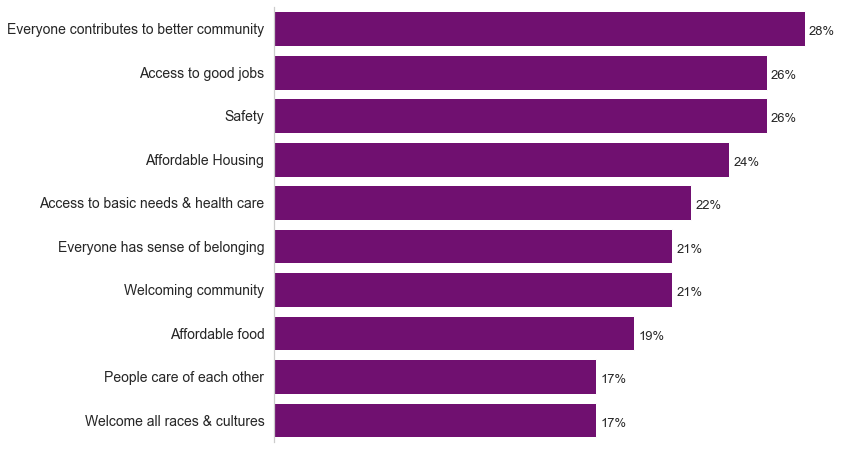

In [428]:
n = len(community_count.index)
i = int(community_count.max())+1

plt.figure(figsize=(10, 8))
g = sns.barplot(y=community_count.index, x=community_count, color='#800080')
g.set_xticks(range(i))
sns.despine(right=True, top=True, bottom=True)
#plt.title('Top 10 suggestions for a better community', fontdict={'size': 18})
plt.yticks(fontsize=14)
plt.xticks([])

for x, y, p in zip(community_count.round(2), range(n),  community_count.round(2)):
    p = str(p) + '%'
    plt.text(x+.2, y+.15, p, fontdict={'fontsize':13})
    
plt.savefig('./Figures/'+  'Better community' , bbox_inches = 'tight', edgecolor='w')

### Community belonging

#### word cloud

In [441]:
text = all_surveys['community_belonging']

In [442]:
from wordcloud import WordCloud, STOPWORDS

In [443]:
type(STOPWORDS)

set

In [444]:
additional_words = {'Nan', 'Nothing', 'Community'}

In [445]:
comment_words = ''
stopwords = STOPWORDS|additional_words

In [446]:
# iterate through the csv file
for val in text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].capitalize()
     
    comment_words += " ".join(tokens)+" "
 

In [460]:
wordcloud = WordCloud(width = 1000, height = 600,
                      background_color ='white',
                      colormap='flare',
                      stopwords = stopwords,
                      min_font_size = 12,
                      max_words=80,
                      relative_scaling=.5,
                      min_word_length=3,
                      prefer_horizontal=1
        
                     ).generate(comment_words)

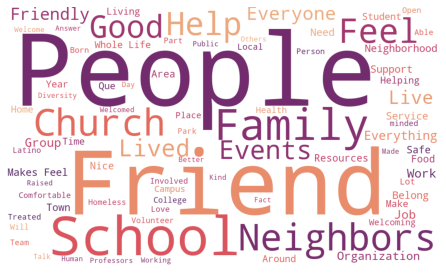

In [461]:
# plot the WordCloud image                      
plt.figure(figsize = (6,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('./Figures/'+  'community belonging' , bbox_inches = 'tight', edgecolor='w')

In [449]:
text = all_surveys[['community_belonging']]

In [154]:
text.dropna(inplace=True)

In [155]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words = stop_words + ['my', 'the', 'like', 'here', 'nothing', 'lived']
text['community_belonging'] = text['community_belonging'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/luisagonzalez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [143]:
text['community_belonging']

0                                    Being human being.
1                       Volunteer work community events
3                Liz HHCD whole team makes feel welcome
4                                         Helping hands
6                          Conversations people conduct
                            ...                        
54    I've long time, home, majority residents commu...
55    Our child’s public school / school board; kind...
1              Being involved school school activities.
6                      Hard working tax payer community
7                                      I nice neighbors
Name: community_belonging, Length: 446, dtype: object

In [126]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
# fit the corpus to CountVectorizer
count_vect.fit(text['community_belonging'])

vec_words = count_vect.transform(text['community_belonging'])

In [127]:
vec_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [99]:
vec_df = pd.DataFrame(columns=count_vect.get_feature_names(), data=vec_words.toarray())

In [100]:
vec_df

,18,20,30,32,46,4th,50,ability,able,about,acceptance,accepting,acceso,access,aceessible,act,activities,addict,adelante,adjusting,adults,advocacy,advocating,affiliated,affiliation,affordable,afghanistan,africa,again,age,agencies,agradezco,al,all,almost,alone,also,always,am,america,amor,amount,and,annual,another,answer,any,anything,apart,apoyo,apoyos,aquí,are,area,arms,army,around,arround,art,asking,asset,atmosphere,attitude,available,avanzar,aware,awareness,away,ayuda,años,back,bad,basis,because,been,being,beliefs,believe,belong,belonged,belonging,beloved,best,better,big,bill,biology,black,blank,block,board,booster,born,bothers,boy,breathing,brother,brotherhood,burton,buscando,businesses,but,by,came,cameras,caminos,campus,can,cant,care,cared,cares,caring,case,celebrate,center,centers,central,certain,change,changing,checking,child,childhood,children,chuch,church,churches,circle,citizenship,city,class,classes,classmates,classroom,clean,clelebration,clinic,clinics,close,club,clubs,co,code,colleagues,college,come,comfortable,coming,commitment,communication,communications,communities,community,companionate,comunidad,comunity,con,conduct,connect,connected,connections,contact,contacts,contribuir,contribute,conversations,core,cosas,cost,could,counselors,countries,country,course,coworkers,created,creció,creencias,culture,current,currently,daily,dairy,day,days,de,decent,decide,degree,department,deposit,desire,devour,die,different,difficult,digna,dignity,dinners,dinámica,discrimination,diversity,diversos,do,doctor,documentation,doesn,don,donations,donde,dont,downtown,drug,easy,economía,educación,education,educator,effingham,efforts,elders,election,electricity,electronics,else,elwood,emergency,empatía,emphatic,employers,en,encontré,engagement,english,enjoy,enormemente,enough,entities,equality,esl,esposa,esta,este,estudiando,están,etc,ethic,even,events,everyone,everything,everywhere,ex,excelling,exista,experience,explaining,external,extra,extracurriculars,extremely,face,facebook,fact,fair,familia,families,family,farmers,feel,feeling,feels,feet,fine,first,flora,fmaily,folks,food,for,foreign,forgotten,foster,free,friend,friendliness,friendly,friends,friendship,future,games,garden,gelt,general,generally,generational,get,getting,given,go,goals,god,going,good,got,grandma,gratuitamente,great,grew,grocery,group,groups,grow,guild,halls,hands,handy,hang,happy,hard,harvard,has,have,having,hay,heal,health,healthcare,healthy,heartland,heavily,held,help,helpful,helpfulness,helping,helps,here,hhcd,hijos,hill,history,home,homebody,homeless,honestly,hook,hope,horizons,hour,housing,how,human,humane,identities,if,igual,il,im,imc,immigration,important,in,including,inclusion,income,individuals,information,informed,integro,interaction,interest,internal,internship,invited,invites,involved,involvement,is,isolated,issue,issues,it,items,job,jobs,joy,judge,july,just,kfc,kids,kind,kindness,kinds,know,knowing,knowledge,la,language,las,last,latino,latinos,learn,learning,legal,less,libraries,library,life,lifestyle,liheap,like,likeminded,listen,live,lived,lives,living,liz,lo,local,lonely,long,longer,look,looks,lord,los,lot,lots,love,loves,low,lugar,lund,made,major,majority,make,makes,manager,manera,many,masters,matter,me,meet,meetings,member,memories,mental,mexican,mi,milw,minded,mis,moment,moms,money,month,mosque,most,mostly,moved,much,muchas,multiple,must,muy,my,na,name,nation,national,native,ncc,nd,nearby,necesito,necessary,need,needs,negative,neighborhood,neighbors,neighbourhood,network,new,nice,no,non,none,nonprofit,north,nothing,now,obtener,of,off,offering,officer,offices,often,okay,old,one,open,openness,oportunidades,opportunities,opportunity,organization,organizations,orgs,orientation,oriente,oriented,origen,other,others,our,outdoor,outside,page,paid,pantries,pantry,pantryand,para,parents,park,parks,part,participate,participating,partir,party,passed,past,patiently,paul,pay,payer,paying,país,peaceful,peer,peers,people,pequeno,permits,person,persona,personally,pers

In [101]:
vec_df.shape

(446, 781)

In [160]:
word_count = vec_df.sum().sort_values(ascending=True)[-14:]

In [161]:
word_count

events       17
help         17
good         18
school       22
here         23
neighbors    25
church       25
family       28
feel         29
the          33
friends      37
my           40
people       51
community    79
dtype: int64

In [162]:
word_count = word_count.drop(['my', 'the', 'here', 'help'])

In [163]:
word_count.index.to_list()

['events',
 'good',
 'school',
 'neighbors',
 'church',
 'family',
 'feel',
 'friends',
 'people',
 'community']

In [164]:
new_index = [i.capitalize() for i in word_count.index.to_list()]

In [165]:
word_count.index = new_index

In [169]:
word_count = word_count.sort_values(ascending=False)

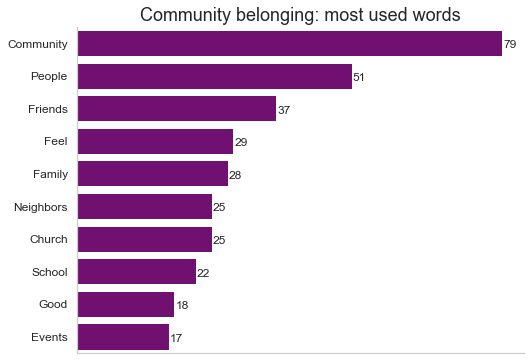

In [171]:
n = len(word_count.index)
i = int(word_count.max())+1

plt.figure(figsize=(8, 6))
g = sns.barplot(y=word_count.index, x=word_count, color='#800080')
g.set_xticks(range(i))
sns.despine(right=True, top=True)
plt.title('Community belonging: most used words', fontdict={'size': 18})
plt.yticks(fontsize=12)
plt.xticks([])

for x, y, p in zip(word_count.round(2), range(n),  word_count.round(2)):
    p = str(p) 
    plt.text(x+.2, y+.15, p, fontdict={'fontweight':'book'})
    
plt.savefig('./Figures/'+  'Word count bar' , bbox_inches = 'tight', edgecolor='w')

### Institutional Trust

In [241]:
institutional = make_vectorized_answers(all_surveys, 'institutional trust')

In [258]:
institutional.shape

(2470, 71)

In [271]:
institutional_count = (institutional.sum().sort_values(ascending=False)[:11]/institutional.shape[0]).round(2)

In [272]:
institutional_count = institutional_count*100

In [276]:
type(institutional_count)

pandas.core.series.Series

In [278]:
institutional_count = institutional_count.astype('int')

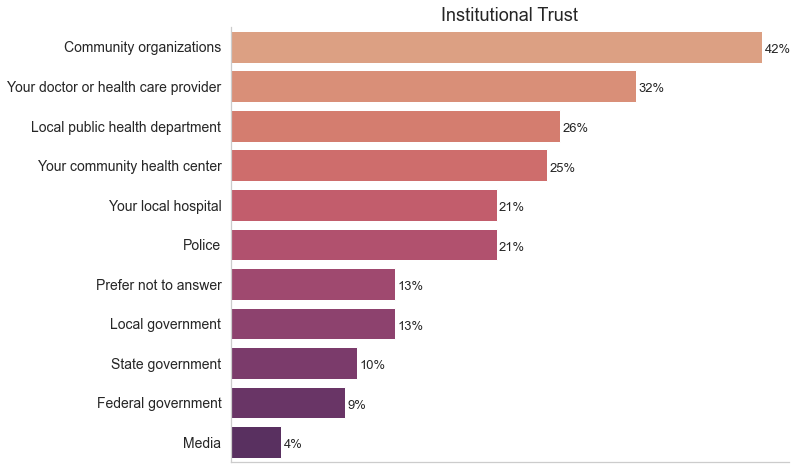

In [352]:
n = len(institutional_count.index)
i = int(institutional_count.max())+1

plt.figure(figsize=(10, 8))
g = sns.barplot(y=institutional_count.index, x=institutional_count, palette='flare')
g.set_xticks(range(i))
sns.despine(right=True, top=True)
plt.title('Institutional Trust', fontdict={'size': 18})
plt.yticks(fontsize=14)
plt.xticks([])

for x, y, p in zip(institutional_count, range(n),  institutional_count):
    p = str(p) + '%'
    plt.text(x+.2, y+.15, p, fontdict={'fontsize':13})
    
plt.savefig('./Figures/'+  'Institutional Trust' , bbox_inches = 'tight', edgecolor='w')

### Treated unfairly

In [304]:
treated_pie = all_surveys['emotionally_upset'].value_counts(ascending=True)

In [305]:
treated_pie

Prefer not to answer    105
Yes                     219
No                      971
Name: emotionally_upset, dtype: int64

In [306]:
treated_pie.sum()

1295

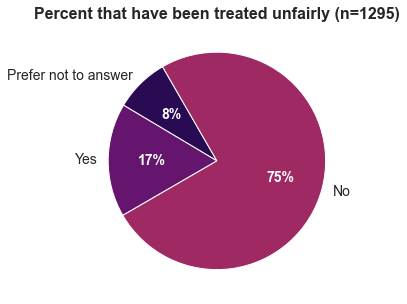

In [307]:
#sns.set(font_scale = 1.1)
plt.figure(figsize=(5,5))
patches, texts, autotexts = plt.pie(x=treated_pie.values, labels=treated_pie.index,
                                                       autopct='%1.0f%%', 
                                                       startangle=120, 
                                                       colors = sns.color_palette('inferno'))

plt.title('Percent that have been treated unfairly (n=1295)',
         fontdict={'size':16, 'fontweight': 'bold'})

for text in texts:
    #text.set_fontweight('bold')
    text.set_size(14);
    
for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    # autotext.set_fontstyle('italic')
    autotext.set_color('w')
    autotext.set_fontweight('bold')
    autotext.set_size(14)

plt.savefig('./Figures/ARISE treated unfairly totals', bbox_inches = 'tight', edgecolor='w')

In [308]:
main_reason = make_vectorized_answers(all_surveys, 'main_reason')

In [313]:
main_reason.shape

(2470, 45)

In [328]:
main_reason['count'] = main_reason.sum(axis=1)

In [330]:
(main_reason['count']>0).sum()

205

In [347]:
# select top 10 reasons
main_reason_pct = (main_reason.sum().sort_values(ascending=False)[:11])/205

In [348]:
main_reason_pct = (main_reason_pct.drop('count').round(2))

In [350]:
main_reason_pct = (main_reason_pct)*100

In [351]:
main_reason_pct = main_reason_pct.astype('int')

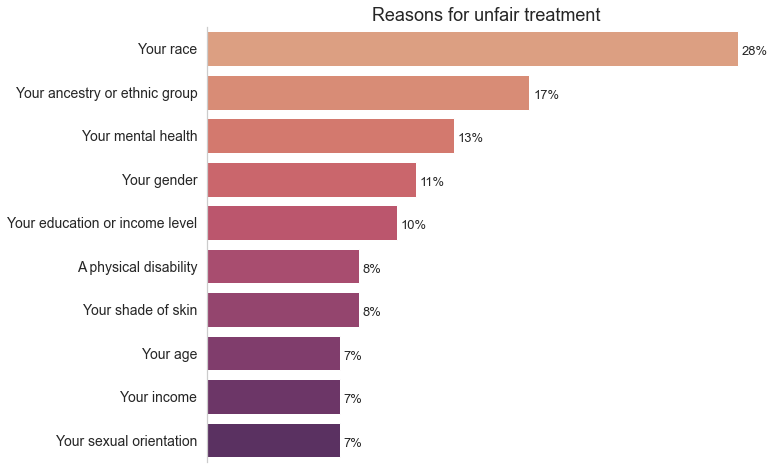

In [355]:
n = len(main_reason_pct.index)
i = int(main_reason_pct.max())+1

plt.figure(figsize=(10, 8))
g = sns.barplot(y=main_reason_pct.index, x=main_reason_pct.values, palette='flare')
g.set_xticks(range(i))
sns.despine(right=True, top=True, bottom=True)
plt.title('Reasons for unfair treatment', fontdict={'size': 18})
plt.yticks(fontsize=14)
plt.xticks([])

for x, y, p in zip(main_reason_pct, range(n),  main_reason_pct):
    p = str(p) + '%'
    plt.text(x+.2, y+.15, p, fontdict={'fontsize':13})
    
plt.savefig('./Figures/'+  'main reasons' , bbox_inches = 'tight', edgecolor='w')